In [1]:
import pandas as pd
import pickle

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.insert(0, './../../preprocessing')

In [4]:
import session as ss

In [5]:
def load_data():
    t = pickle.load( open( "./../../data_set.p", "rb" ) )
    t = ss.define_session(t)
    return t

In [6]:
df = load_data()

3584043


In [7]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [8]:
corpus = []
for uuid, row in df.groupby('UUID'):
    session = []
    for a in row['action_cleaned']:
        session.append(a)
    corpus.append(session)

total_examples = len(corpus)
print('num sessions', total_examples)
print('total num events',len(df)) 

num sessions 200324
total num events 3584043


In [9]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(corpus)
dictionary.save('dictionary.dict')
print(dictionary)

Dictionary(214 unique tokens: ['click_on_number_details', 'click_on_subscription', 'load_homepage', 'loading subscriptions', 'click_on_send']...)


In [10]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print(len(doc_term_matrix))
print(doc_term_matrix[100])

200324
[(1, 4), (3, 2), (14, 5), (44, 1), (85, 5), (103, 5)]


In [52]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50)
print('used: {:.2f}s'.format(time()-start))

used: 1766.25s


In [13]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(3, '0.440*"search" + 0.243*"click_on_number_details" + 0.092*"click_on_terminate" + 0.092*"click_on_subscription_detail"'), (12, '0.543*"click_on_name" + 0.216*"click_on_subscription" + 0.094*"load_homepage" + 0.040*"click_on_menu_accounts"')]


In [14]:
for i in ldamodel.print_topics(): 
    for j in i: print(j)

0
0.398*"click_on_save" + 0.250*"click_on_edit_field" + 0.103*"click_on_number_details" + 0.073*"click_on_MBN_sub" + 0.043*"click_on_new_settings" + 0.033*"click_on_user_type" + 0.031*"click_on_find_person" + 0.028*"load_other_page" + 0.022*"click_on_cancel" + 0.014*"click_on_reference"
1
0.306*"open_invoice_account" + 0.129*"click_on_number_details" + 0.123*"click_on_company" + 0.085*"click_on_menu_subscriptions" + 0.054*"click_on_confirm" + 0.043*"click_on_get_report" + 0.041*"load_homepage" + 0.040*"click_on_new_report" + 0.033*"scroll_on_reports_page" + 0.031*"load_other_page"
2
0.260*"click_on_change_account" + 0.246*"click_on_arrow" + 0.085*"click_on_activate" + 0.081*"click_on_number_details" + 0.075*"activate_new" + 0.052*"click_on_sim_card" + 0.040*"load_homepage" + 0.029*"click_on_add" + 0.026*"loading subscriptions" + 0.025*"click_on_navicon"
3
0.440*"search" + 0.243*"click_on_number_details" + 0.092*"click_on_terminate" + 0.092*"click_on_subscription_detail" + 0.080*"load_h

In [53]:
ldamodel.save('6_topics/topic.model')

In [41]:
from gensim.models import LdaModel
loading = LdaModel.load('10_topics/topic.model')

In [23]:
print(loading.print_topics(num_topics=2, num_words=4))

[(2, '0.297*"click_log_out" + 0.184*"load_homepage" + 0.112*"click_on_confirm" + 0.097*"account_reference"'), (1, '0.114*"go_back_to_homepage" + 0.107*"click_on_agreements" + 0.085*"adding_additional_services" + 0.073*"load_homepage"')]


In [13]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [54]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('6_topics/topic.model')

In [55]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.151493 -0.068586       1        1  23.775375
4      0.081098  0.036277       2        1  22.584913
3      0.204331  0.026126       3        1  18.594704
5     -0.210556 -0.368795       4        1  13.451663
2      0.106960  0.112309       5        1  13.108097
1     -0.333328  0.262669       6        1   8.485251, topic_info=     Category           Freq                                 Term  \
term                                                                
6     Default  410414.000000                   scroll_on_homepage   
5     Default  200270.000000          interact_with_pop_up_window   
46    Default  208621.000000                               search   
33    Default   85909.000000           click_next_in_subscr_order   
0     Default  269033.000000              click_on_number_details   
44    Default   82451.000000               empty_subselect_ignore   
1     Default  183443.000000                click_on_subscription   
27    Default   75011.000000                        click_log_out   
14    Default  156217.000000                        click_on_name   
13    Default   71289.000000                     click_on_confirm   
43    Default   43301.000000         click_on_subscription_detail   
36    Default   35259.000000            click_on_new_subscription   
81    Default   47669.000000                   click_on_terminate   
85    Default   65409.000000                        click_on_save   
7     Default   26062.000000                           start_chat   
4     Default   24263.000000                        click_on_send   
26    Default   26409.000000                    account_reference   
10    Default   35954.000000                  click_on_agreements   
54    Default   54085.000000                       click_on_arrow   
103   Default   38892.000000                  click_on_edit_field   
29    Default   24751.000000              click_on_administrators   
18    Default   24136.000000                       interrupt_task   
3     Default   42878.000000                loading subscriptions   
2     Default  202141.000000                        load_homepage   
19    Default   24152.000000                 click_on_bedrift_sub   
20    Default   76339.000000                         submit_order   
47    Default   23335.000000             click_on_unpaid_invoices   
60    Default   19937.000000                       see_agreements   
84    Default   14577.000000                 click_on_find_person   
39    Default   28294.000000           adding_additional_services   
...       ...            ...                                  ...   
18     Topic6    9014.583008                       interrupt_task   
212    Topic6       0.306298    order_overview_check_other_orders   
213    Topic6       0.306298   order_overview_check_single_orders   
91     Topic6     415.926971                        click_on_menu   
55     Topic6     410.998962                       click_on_inbox   
124    Topic6     383.276642                click_on_other_change   
15     Topic6      75.120499     click_on_order_new_cloud_service   
105    Topic6     108.959984                  click_on_magic_link   
126    Topic6     181.417831                   click_on_check_out   
23     Topic6   11291.893555                       click_on_other   
133    Topic6      60.844864          click_on_change_invoice_ref   
141    Topic6      93.924133                   GDPR_related_click   
28     Topic6    1197.111694             click_on_accept_continue   
87     Topic6     129.352890                       click_on_fixed   
134    Topic6      66.394081  click_on_locations_of subscriptions   
150    Topic6     136.625504                    click_on_homepage   
79     Topic6     936.624084                  click_on_time_range   
2      Topic6    7320.238281                        load_homepage   
47    

In [33]:
pyLDAvis.save_html(data,'vis.html')

In [34]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('./topic.model')

CPU times: user 3.1 ms, sys: 7 µs, total: 3.11 ms
Wall time: 2.71 ms


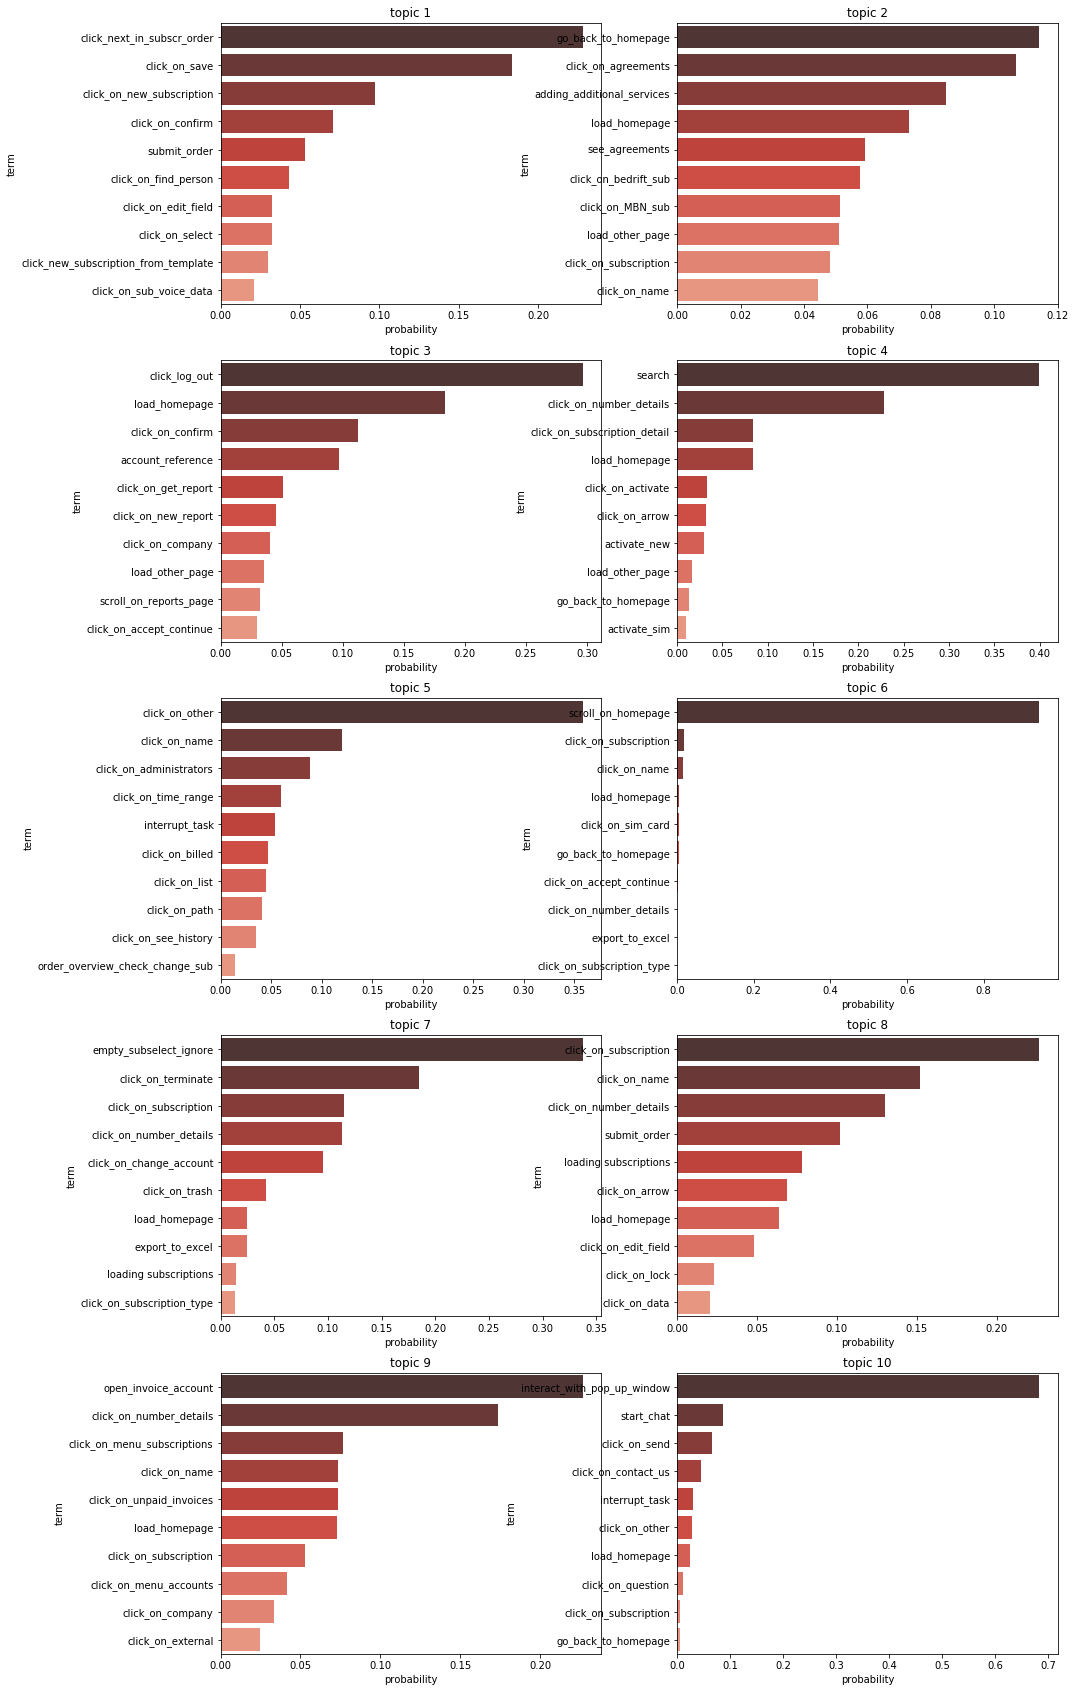

In [35]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    # df=df.sort_values('prob')
    
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    
plt.show()